## **By Mohamed Ali**

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv


In [31]:
!pip install lazypredict

## **Importing packages**

In [61]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## **Reading data and performing EDA to get insights**

In [33]:
# Data exploration
df = pd.read_csv("/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.99,157.30,75.00,0.01,0.00,0.00,0.01,0.01,0.04,...,0.07,0.02,21.03,1,0.41,0.82,-4.81,0.27,2.30,0.28
1,phon_R01_S01_2,122.40,148.65,113.82,0.01,0.00,0.00,0.01,0.01,0.06,...,0.09,0.02,19.09,1,0.46,0.82,-4.08,0.34,2.49,0.37
2,phon_R01_S01_3,116.68,131.11,111.56,0.01,0.00,0.01,0.01,0.02,0.05,...,0.08,0.01,20.65,1,0.43,0.83,-4.44,0.31,2.34,0.33
3,phon_R01_S01_4,116.68,137.87,111.37,0.01,0.00,0.01,0.01,0.02,0.05,...,0.09,0.01,20.64,1,0.43,0.82,-4.12,0.33,2.41,0.37
4,phon_R01_S01_5,116.01,141.78,110.66,0.01,0.00,0.01,0.01,0.02,0.06,...,0.10,0.02,19.65,1,0.42,0.82,-3.75,0.23,2.33,0.41


In [34]:
#columns names
pd.DataFrame(df.columns)

,0
0,name
1,MDVP:Fo(Hz)
2,MDVP:Fhi(Hz)
3,MDVP:Flo(Hz)
4,MDVP:Jitter(%)
5,MDVP:Jitter(Abs)
6,MDVP:RAP
7,MDVP:PPQ
8,Jitter:DDP
9,MDVP:Shimmer


In [35]:
# checking for NaN values
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### There is no NaN values here which is good

## **Some basic statistics**

In [36]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,...,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00
mean,154.23,197.10,116.32,0.01,0.00,0.00,0.00,0.01,0.03,0.28,...,0.05,0.02,21.89,0.75,0.50,0.72,-5.68,0.23,2.38,0.21
std,41.39,91.49,43.52,0.00,0.00,0.00,0.00,0.01,0.02,0.19,...,0.03,0.04,4.43,0.43,0.10,0.06,1.09,0.08,0.38,0.09
min,88.33,102.14,65.48,0.00,0.00,0.00,0.00,0.00,0.01,0.09,...,0.01,0.00,8.44,0.00,0.26,0.57,-7.96,0.01,1.42,0.04
25%,117.57,134.86,84.29,0.00,0.00,0.00,0.00,0.00,0.02,0.15,...,0.02,0.01,19.20,1.00,0.42,0.67,-6.45,0.17,2.10,0.14
50%,148.79,175.83,104.31,0.00,0.00,0.00,0.00,0.01,0.02,0.22,...,0.04,0.01,22.09,1.00,0.50,0.72,-5.72,0.22,2.36,0.19
75%,182.77,224.21,140.02,0.01,0.00,0.00,0.00,0.01,0.04,0.35,...,0.06,0.03,25.08,1.00,0.59,0.76,-5.05,0.28,2.64,0.25
max,260.11,592.03,239.17,0.03,0.00,0.02,0.02,0.06,0.12,1.30,...,0.17,0.31,33.05,1.00,0.69,0.83,-2.43,0.45,3.67,0.53


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [38]:
df.status.value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: >

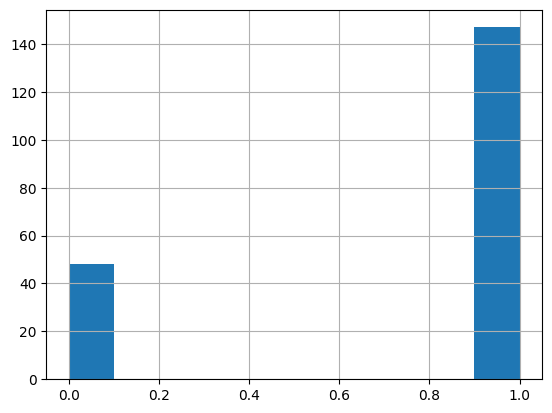

In [39]:
df.status.hist()

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>],
       [<Axes: title={'center': 'spread2'}>,
   

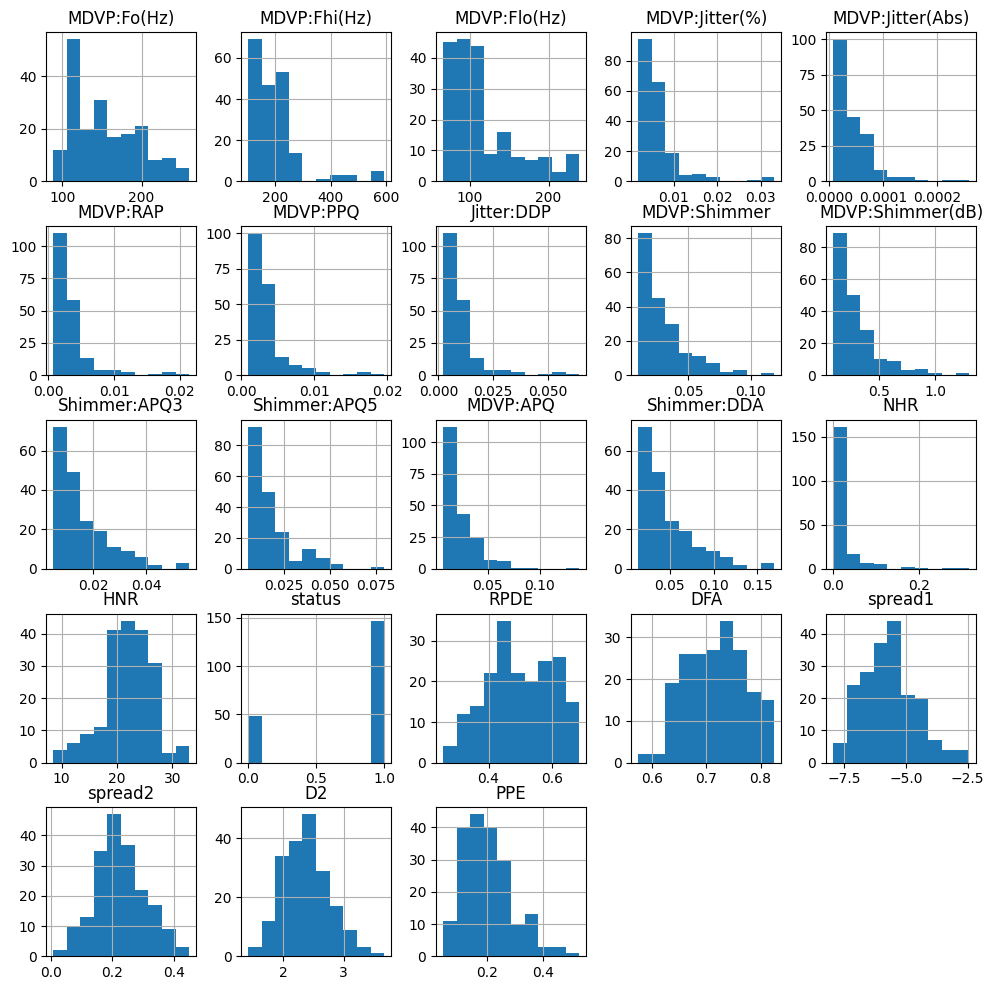

In [40]:
df.hist(figsize=(12,12))

### Our dataset presents a class imbalance, with instances of class ‘1’ being approximately three times as frequent as instances of class ‘0’. 
### Given the small size of the dataset, there is a high risk of overfitting during model training.

In [58]:
# Labels rating
sub0 = df.status.value_counts()[0] / len(df.status)
sub1 = df.status.value_counts()[1] / len(df.status)
sub0, sub1

(0.24615384615384617, 0.7538461538461538)

## **Preparing the data for the model**

In [42]:
# Separating the label from the features
X = df.drop(columns=["status", "name"])
y = df.status

In [43]:
X.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.99,157.30,75.00,0.01,0.00,0.00,0.01,0.01,0.04,0.43,...,0.03,0.07,0.02,21.03,0.41,0.82,-4.81,0.27,2.30,0.28
1,122.40,148.65,113.82,0.01,0.00,0.00,0.01,0.01,0.06,0.63,...,0.04,0.09,0.02,19.09,0.46,0.82,-4.08,0.34,2.49,0.37
2,116.68,131.11,111.56,0.01,0.00,0.01,0.01,0.02,0.05,0.48,...,0.04,0.08,0.01,20.65,0.43,0.83,-4.44,0.31,2.34,0.33
3,116.68,137.87,111.37,0.01,0.00,0.01,0.01,0.02,0.05,0.52,...,0.04,0.09,0.01,20.64,0.43,0.82,-4.12,0.33,2.41,0.37
4,116.01,141.78,110.66,0.01,0.00,0.01,0.01,0.02,0.06,0.58,...,0.04,0.10,0.02,19.65,0.42,0.82,-3.75,0.23,2.33,0.41


In [44]:
# Scaling and normalizing the data
scaler = StandardScaler()
normalizer = MinMaxScaler()
X = scaler.fit_transform(X)
X = normalizer.fit_transform(X)
X[:5]

array([[0.18430827, 0.11259173, 0.05481479, 0.1956798 , 0.24901186,
        0.14547206, 0.24758842, 0.14528817, 0.31221472, 0.28019721,
        0.33262712, 0.34735414, 0.17244812, 0.33258441, 0.06830697,
        0.5117451 , 0.36915542, 0.96014836, 0.56987521, 0.58576513,
        0.39066128, 0.4973096 ],
       [0.19832685, 0.09493044, 0.2783228 , 0.25412961, 0.28853755,
        0.19123314, 0.32368703, 0.1910419 , 0.47288662, 0.44453574,
        0.51598613, 0.53568521, 0.27942415, 0.51604827, 0.05933094,
        0.43257742, 0.47083048, 0.97702445, 0.70327699, 0.74133704,
        0.47314522, 0.67132602],
       [0.16503854, 0.05912816, 0.26528838, 0.28017789, 0.32806324,
        0.22928709, 0.36923901, 0.22941082, 0.39063356, 0.326212  ,
        0.44337442, 0.44613297, 0.21984838, 0.4433175 , 0.0395964 ,
        0.49622043, 0.40441597, 1.        , 0.6367447 , 0.68637091,
        0.40881938, 0.59668246],
       [0.16500361, 0.07292732, 0.26420026, 0.2633418 , 0.32806324,
        0.2090558

In [45]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, stratify=y)
X_train.shape, X_test.shape

((156, 22), (39, 22))

## **Trying some models and technique out**

In [46]:
# The best models to use on the data
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, prediction = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 18.53it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.92               0.92     0.92      0.92   
LGBMClassifier                     0.95               0.90     0.90      0.95   
Perceptron                         0.95               0.90     0.90      0.95   
ExtraTreesClassifier               0.92               0.88     0.88      0.92   
LabelPropagation                   0.82               0.88     0.88      0.83   
LabelSpreading                     0.82               0.88     0.88      0.83   
SVC                                0.92               0.85     0.85      0.92   
RidgeClassifierCV                  0.92               0.85     0.85      0.92   
RidgeClassifier                    0.92               0.85     0.85      0.92   
BaggingClassifier                  0.92               0.85     0.85      0.92   
LinearSVC                   

In [47]:
# First model Knn
model = KNeighborsClassifier()#weights=[weight0, weight1])

# Define the grid of parameters to search over
param_grid = {
    'n_neighbors': [2, 3, 5, 7,9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Create the GridSearchCV object
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_

print(f"Best parameters: {best_params}")


Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


#### KNeighborsClassifier

In [49]:
# Trying KNN model with the best parameters
KNN = KNeighborsClassifier(algorithm='auto',
                                   leaf_size=10,
                                   metric= 'euclidean',
                                   n_neighbors=2,
                                   p= 1,
                                   weights='distance')
# Fitting the model to the training data
KNN.fit(X_train, y_train)

# Get model predictions
y_pred = KNN.predict(X_test)

# Accuracy and scores
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}\n\n")
print("Classification Report:\n\n")
print(classification_report(y_test, y_pred),"\n\n\n\n")


Accuracy: 0.9487179487179487


Classification Report:


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39
 






#### LGBMClassifier

In [29]:
# Trying LGBMClassifier model
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred2 = lgbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print(f"\nAccuracy: {accuracy}\n\n")
print("Classification Report:\n\n")
print(classification_report(y_test, y_pred2), "\n\n\n\n")


Accuracy: 0.9487179487179487


Classification Report:


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39
 






In [51]:
# Trying Cross-validation for overfitting
y_train_pred = lgbm2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'\nTraining Accuracy: {train_accuracy}\n\n')

# Cross-validation score
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=5)
print(f'Cross-validation Scores: {cv_scores}\n\n')
print(f'Average Cross-validation Score: {np.mean(cv_scores)}\n\n')


Training Accuracy: 0.9871794871794872


Cross-validation Scores: [0.9375     0.93548387 0.96774194 0.83870968 0.90322581]


Average Cross-validation Score: 0.9165322580645162




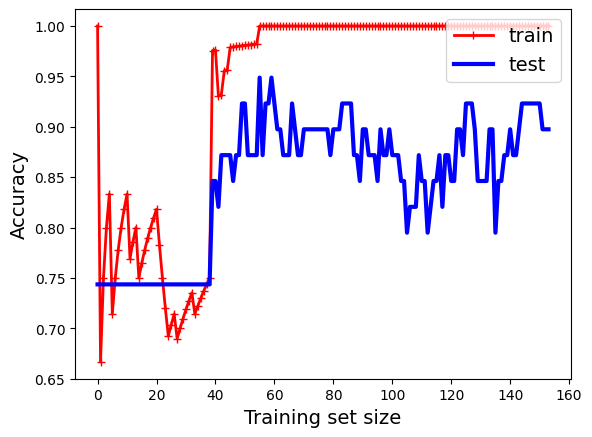

In [56]:
# Plot learning curves
lgbm2 = LGBMClassifier()
train_errors, test_errors = [], []
for m in range(2, len(X_train)):
    lgbm2.fit(X_train[:m], y_train[:m])
    y_train_predict = lgbm2.predict(X_train[:m])
    y_test_predict = lgbm2.predict(X_test)
    train_errors.append(accuracy_score(y_train[:m], y_train_predict))
    test_errors.append(accuracy_score(y_test, y_test_predict))

plt.plot(train_errors, "r-+", linewidth=2, label="train")
plt.plot(test_errors, "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.show()

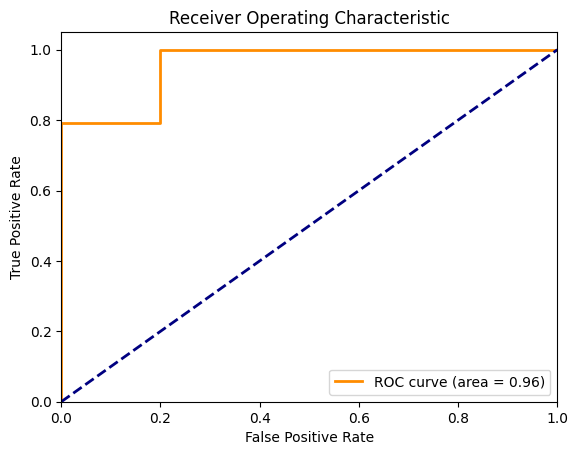

In [57]:
# Assuming y_test are your true binary labels and y_score are the predicted probabilities from your model
y_test = label_binarize(y_test, classes=[0, 1])
y_score = lgbm2.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### SVC 

In [64]:
# SVC model with respect to weights
svc = SVC(class_weight={0: 9, 1:3})
svc.fit(X_train, y_train)
y_pred3 = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print(f"\nAccuracy: {accuracy}\n\n")
print("Classification Report:\n\n")
print(classification_report(y_test, y_pred3), "\n\n\n\n")


Accuracy: 0.8461538461538461


Classification Report:


              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.93      0.86      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.86      0.85      0.85        39
 






## **End Of Task**